In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [3]:
# Load the data. 
# Used zip file bcse csv file was too big to upload to github.
#df = pd.read_csv('../Resources/2017.csv')
df = pd.read_csv('../Resources/2017.csv')
df.head(3).append(df.tail(3))

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2017-01-01,AA,1,JFK,LAX,800,831.0,31.0,25.0,856.0,...,402.0,398.0,347.0,2475.0,27.0,0.0,0.0,0.0,0.0,NaN
1,2017-01-01,AA,2,LAX,JFK,900,934.0,34.0,34.0,1008.0,...,327.0,335.0,289.0,2475.0,34.0,0.0,8.0,0.0,0.0,NaN
2,2017-01-01,AA,4,LAX,JFK,1130,1221.0,51.0,20.0,1241.0,...,328.0,319.0,284.0,2475.0,7.0,0.0,0.0,0.0,35.0,NaN
5674618,2017-12-31,UA,2426,SNA,DEN,1335,1334.0,-1.0,9.0,1343.0,...,134.0,123.0,104.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN
5674619,2017-12-31,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,99.0,92.0,66.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
5674620,2017-12-31,UA,2429,EWR,DEN,1510,1612.0,62.0,28.0,1640.0,...,270.0,266.0,227.0,1605.0,58.0,0.0,0.0,0.0,0.0,NaN


In [4]:
df.OP_CARRIER.unique()

array(['AA', 'B6', 'EV', 'HA', 'NK', 'OO', 'UA', 'VX', 'AS', 'WN', 'DL',
       'F9'], dtype=object)

In [5]:
df['OP_CARRIER'].replace({
    'UA':'United Airlines',
    'AS':'Alaska Airlines',
    '9E':'Endeavor Air',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines'
}, inplace=True)

In [6]:
df.OP_CARRIER.unique()

array(['American Airlines', 'JetBlue Airways', 'ExpressJet',
       'Hawaiian Airlines', 'Spirit Airlines', 'SkyWest Airlines',
       'United Airlines', 'Virgin America', 'Alaska Airlines',
       'Southwest Airlines', 'Delta Airlines', 'Frontier Airlines'],
      dtype=object)

In [7]:
#Deleting cancelled flights
df_new = df[df['CANCELLED']==0]
df['CANCELLED'].unique()
print(f'Total rows after temoving column "CANCELLED" = {len(df_new)}')

Total rows after temoving column "CANCELLED" = 5591928


In [8]:
#Dropping the columns which are not required
df = df.drop(["OP_CARRIER_FL_NUM","DEP_TIME","ARR_TIME","CANCELLED","CANCELLATION_CODE","DIVERTED","CARRIER_DELAY"
             ,"WEATHER_DELAY","NAS_DELAY","SECURITY_DELAY","LATE_AIRCRAFT_DELAY","Unnamed: 27"], axis=1)
print(f'Total rows after dropping  = {len(df)}\n')
for col in df.columns:
    print(col)
df.head(3).append(df.tail(3))

Total rows after dropping  = 5674621

FL_DATE
OP_CARRIER
ORIGIN
DEST
CRS_DEP_TIME
DEP_DELAY
TAXI_OUT
WHEELS_OFF
WHEELS_ON
TAXI_IN
CRS_ARR_TIME
ARR_DELAY
CRS_ELAPSED_TIME
ACTUAL_ELAPSED_TIME
AIR_TIME
DISTANCE


,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2017-01-01,American Airlines,JFK,LAX,800,31.0,25.0,856.0,1143.0,26.0,1142,27.0,402.0,398.0,347.0,2475.0
1,2017-01-01,American Airlines,LAX,JFK,900,34.0,34.0,1008.0,1757.0,12.0,1727,42.0,327.0,335.0,289.0,2475.0
2,2017-01-01,American Airlines,LAX,JFK,1130,51.0,20.0,1241.0,2025.0,15.0,1958,42.0,328.0,319.0,284.0,2475.0
5674618,2017-12-31,United Airlines,SNA,DEN,1335,-1.0,9.0,1343.0,1627.0,10.0,1649,-12.0,134.0,123.0,104.0,846.0
5674619,2017-12-31,United Airlines,LAS,SFO,1115,-8.0,11.0,1118.0,1224.0,15.0,1254,-15.0,99.0,92.0,66.0,414.0
5674620,2017-12-31,United Airlines,EWR,DEN,1510,62.0,28.0,1640.0,1827.0,11.0,1740,58.0,270.0,266.0,227.0,1605.0


In [9]:
df.dtypes

FL_DATE                 object
OP_CARRIER              object
ORIGIN                  object
DEST                    object
CRS_DEP_TIME             int64
DEP_DELAY              float64
TAXI_OUT               float64
WHEELS_OFF             float64
WHEELS_ON              float64
TAXI_IN                float64
CRS_ARR_TIME             int64
ARR_DELAY              float64
CRS_ELAPSED_TIME       float64
ACTUAL_ELAPSED_TIME    float64
AIR_TIME               float64
DISTANCE               float64
dtype: object

In [10]:
df = df.dropna()
print(f'Total rows after Dropping NaN = {len(df)}\n')
df.isna().sum()

Total rows after Dropping NaN = 5579410



FL_DATE                0
OP_CARRIER             0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
DEP_DELAY              0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_DELAY              0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
dtype: int64

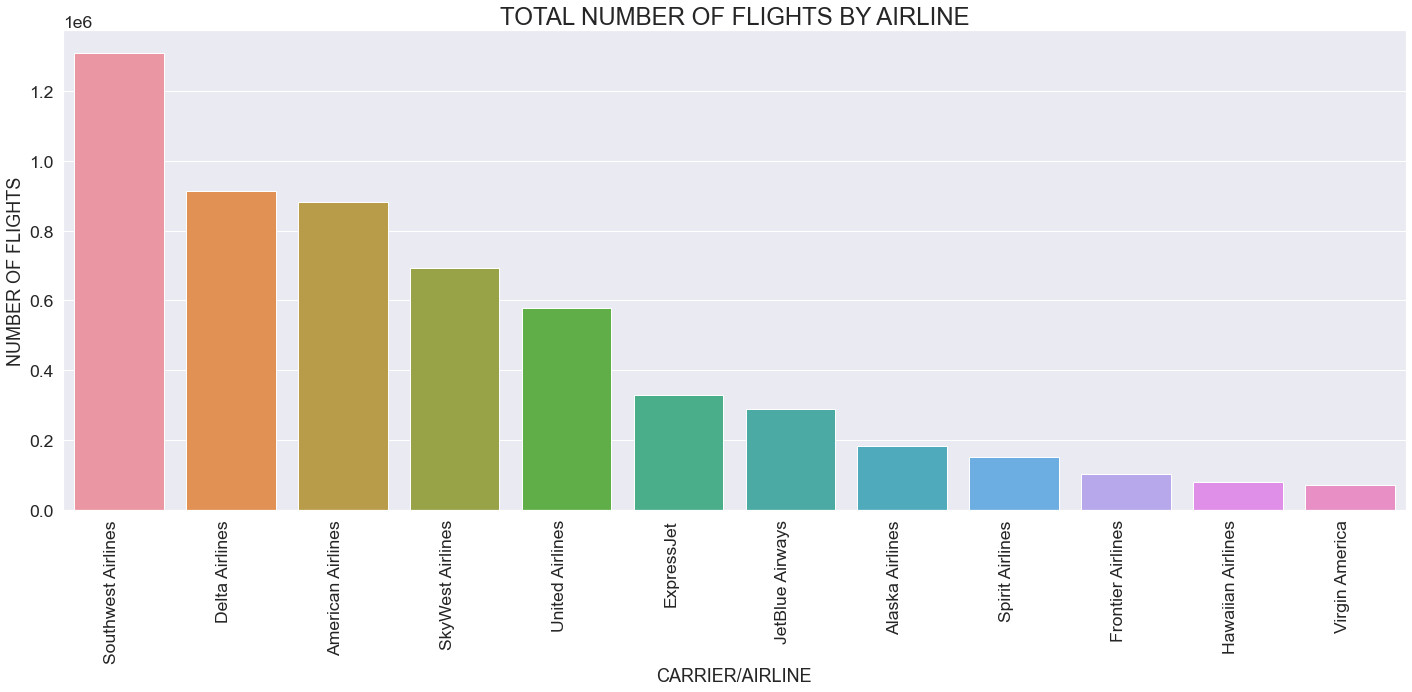

In [11]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df['OP_CARRIER'], data=df, order=df['OP_CARRIER'].value_counts().iloc[0:18].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('TOTAL NUMBER OF FLIGHTS BY AIRLINE', fontsize=24)
plt.xlabel('CARRIER/AIRLINE', fontsize=18)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=18)
plt.tight_layout()
plt.show()

In [12]:
# Given we know by the Arr_Delay field if the flight was delayed we are going to add a field called Flight Status and make
# it binary where a "1" means the flight was delayed and a "0" means that it was not delayed

status = []

for value in df['ARR_DELAY']:
    if value < 0:
        status.append(0)
    else:
        status.append(1)
df['FLIGHT_STATUS'] = status
df.head(3).append(df.tail(3))    

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHT_STATUS
0,2017-01-01,American Airlines,JFK,LAX,800,31.0,25.0,856.0,1143.0,26.0,1142,27.0,402.0,398.0,347.0,2475.0,1
1,2017-01-01,American Airlines,LAX,JFK,900,34.0,34.0,1008.0,1757.0,12.0,1727,42.0,327.0,335.0,289.0,2475.0,1
2,2017-01-01,American Airlines,LAX,JFK,1130,51.0,20.0,1241.0,2025.0,15.0,1958,42.0,328.0,319.0,284.0,2475.0,1
5674618,2017-12-31,United Airlines,SNA,DEN,1335,-1.0,9.0,1343.0,1627.0,10.0,1649,-12.0,134.0,123.0,104.0,846.0,0
5674619,2017-12-31,United Airlines,LAS,SFO,1115,-8.0,11.0,1118.0,1224.0,15.0,1254,-15.0,99.0,92.0,66.0,414.0,0
5674620,2017-12-31,United Airlines,EWR,DEN,1510,62.0,28.0,1640.0,1827.0,11.0,1740,58.0,270.0,266.0,227.0,1605.0,1


In [13]:
df.OP_CARRIER.value_counts()

Southwest Airlines    1308989
Delta Airlines         912792
American Airlines      882218
SkyWest Airlines       694014
United Airlines        577212
ExpressJet             328574
JetBlue Airways        289627
Alaska Airlines        183056
Spirit Airlines        151468
Frontier Airlines      101917
Hawaiian Airlines       79861
Virgin America          69682
Name: OP_CARRIER, dtype: int64

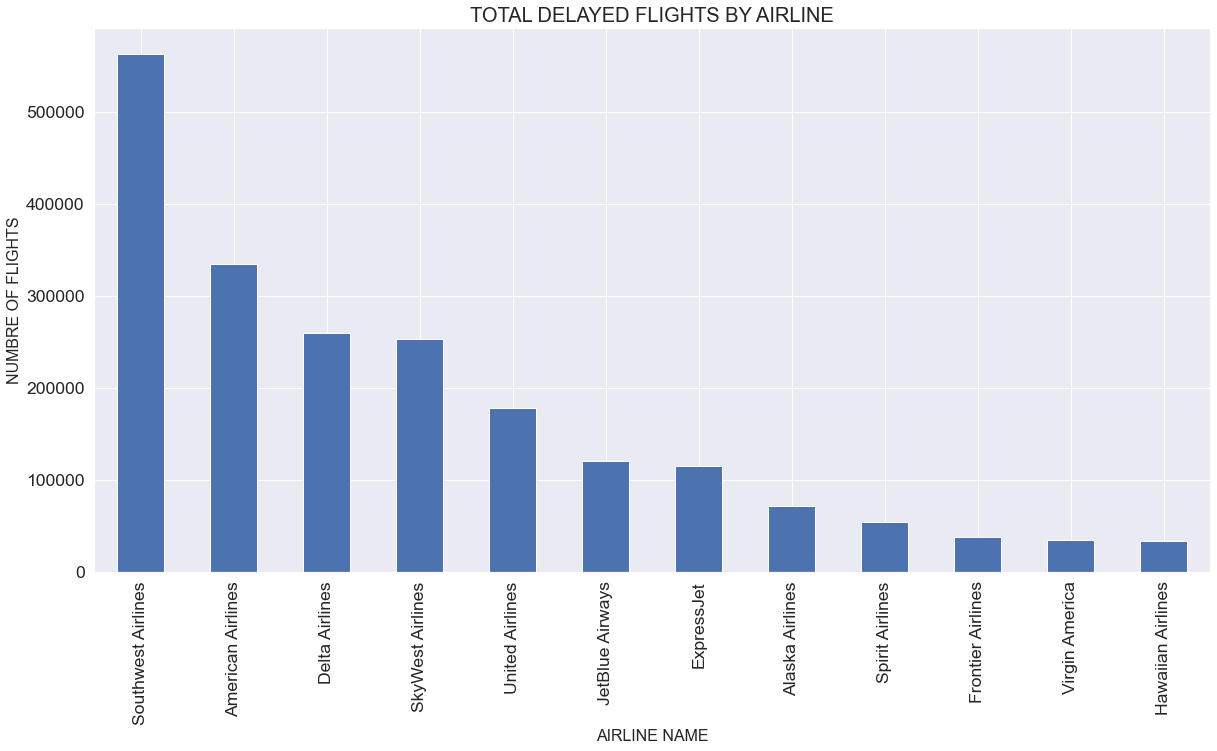

In [14]:
plt.figure(figsize=(20, 10))
df.groupby('OP_CARRIER').FLIGHT_STATUS.sum().sort_values(ascending=False).plot.bar()
plt.title('TOTAL DELAYED FLIGHTS BY AIRLINE', fontsize=20)
plt.xlabel('AIRLINE NAME', fontsize=16)
plt.ylabel('NUMBRE OF FLIGHTS', fontsize=16)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

In [15]:
# Creating Day and Month Columns so we can analyze if certain days or months have more flight delays

df['DAY'] = pd.DatetimeIndex(df['FL_DATE']).day
df['MONTH'] = pd.DatetimeIndex(df['FL_DATE']).month
df.head(3).append(df.tail(3))

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHT_STATUS,DAY,MONTH
0,2017-01-01,American Airlines,JFK,LAX,800,31.0,25.0,856.0,1143.0,26.0,1142,27.0,402.0,398.0,347.0,2475.0,1,1,1
1,2017-01-01,American Airlines,LAX,JFK,900,34.0,34.0,1008.0,1757.0,12.0,1727,42.0,327.0,335.0,289.0,2475.0,1,1,1
2,2017-01-01,American Airlines,LAX,JFK,1130,51.0,20.0,1241.0,2025.0,15.0,1958,42.0,328.0,319.0,284.0,2475.0,1,1,1
5674618,2017-12-31,United Airlines,SNA,DEN,1335,-1.0,9.0,1343.0,1627.0,10.0,1649,-12.0,134.0,123.0,104.0,846.0,0,31,12
5674619,2017-12-31,United Airlines,LAS,SFO,1115,-8.0,11.0,1118.0,1224.0,15.0,1254,-15.0,99.0,92.0,66.0,414.0,0,31,12
5674620,2017-12-31,United Airlines,EWR,DEN,1510,62.0,28.0,1640.0,1827.0,11.0,1740,58.0,270.0,266.0,227.0,1605.0,1,31,12


In [16]:
# If we leave the military times for time based fields at the elemental levels they are, we create too many columns when we 
# hot encode, so we are separating the times in to 4 quadrants for the four time based fields below.  

df['CRS_DEP_TIME'] = np.ceil(df['CRS_DEP_TIME']/600).apply(int)
df['WHEELS_OFF'] = np.ceil(df['WHEELS_OFF']/600).apply(int) 
df['WHEELS_ON'] = np.ceil(df['WHEELS_ON']/600).apply(int)
df['CRS_ARR_TIME'] = np.ceil(df['CRS_ARR_TIME']/600).apply(int)
df.head(3).append(df.tail(3))

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHT_STATUS,DAY,MONTH
0,2017-01-01,American Airlines,JFK,LAX,2,31.0,25.0,2,2,26.0,2,27.0,402.0,398.0,347.0,2475.0,1,1,1
1,2017-01-01,American Airlines,LAX,JFK,2,34.0,34.0,2,3,12.0,3,42.0,327.0,335.0,289.0,2475.0,1,1,1
2,2017-01-01,American Airlines,LAX,JFK,2,51.0,20.0,3,4,15.0,4,42.0,328.0,319.0,284.0,2475.0,1,1,1
5674618,2017-12-31,United Airlines,SNA,DEN,3,-1.0,9.0,3,3,10.0,3,-12.0,134.0,123.0,104.0,846.0,0,31,12
5674619,2017-12-31,United Airlines,LAS,SFO,2,-8.0,11.0,2,3,15.0,3,-15.0,99.0,92.0,66.0,414.0,0,31,12
5674620,2017-12-31,United Airlines,EWR,DEN,3,62.0,28.0,3,4,11.0,3,58.0,270.0,266.0,227.0,1605.0,1,31,12


In [15]:
import calendar
df['MONTH_NAME'] = df['MONTH'].apply(lambda x: calendar.month_abbr[x])
df.head(3).append(df.tail(3))

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHT_STATUS,DAY,MONTH,MONTH_NAME
0,2017-01-01,American Airlines,JFK,LAX,2,31.0,25.0,2,2,26.0,2,27.0,402.0,398.0,347.0,2475.0,1,1,1,Jan
1,2017-01-01,American Airlines,LAX,JFK,2,34.0,34.0,2,3,12.0,3,42.0,327.0,335.0,289.0,2475.0,1,1,1,Jan
2,2017-01-01,American Airlines,LAX,JFK,2,51.0,20.0,3,4,15.0,4,42.0,328.0,319.0,284.0,2475.0,1,1,1,Jan
5674618,2017-12-31,United Airlines,SNA,DEN,3,-1.0,9.0,3,3,10.0,3,-12.0,134.0,123.0,104.0,846.0,0,31,12,Dec
5674619,2017-12-31,United Airlines,LAS,SFO,2,-8.0,11.0,2,3,15.0,3,-15.0,99.0,92.0,66.0,414.0,0,31,12,Dec
5674620,2017-12-31,United Airlines,EWR,DEN,3,62.0,28.0,3,4,11.0,3,58.0,270.0,266.0,227.0,1605.0,1,31,12,Dec


In [28]:
# TOP 10 origin cities.
df.ORIGIN.value_counts().head(10)

ATL    358537
ORD    262074
DEN    221148
LAX    211730
DFW    178967
SFO    170943
PHX    153378
LAS    150132
SEA    136020
MSP    133470
Name: ORIGIN, dtype: int64

In [30]:
# TOP 10 Destination cities.
df.DEST.value_counts().head(10)

ATL    358263
ORD    261800
DEN    221280
LAX    211786
DFW    178608
SFO    170824
PHX    153160
LAS    150221
SEA    135918
MSP    133579
Name: DEST, dtype: int64

In [56]:
# TOP 4 origin cities.
df.ORIGIN.value_counts().head(10)
df1 = df.loc[df['ORIGIN'].isin(['ATL','LAS','DEN','DFW'])]
# df1.head(3).append(df1.tail(3))
df1

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHT_STATUS,DAY,MONTH
3,2017-01-01,American Airlines,DFW,HNL,2,77.0,19.0,3,3,5.0,3,97.0,517.0,537.0,513.0,3784.0,1,1,1
5,2017-01-01,American Airlines,DFW,OGG,2,399.0,12.0,3,4,6.0,3,394.0,503.0,498.0,480.0,3711.0,1,1,1
27,2017-01-01,American Airlines,DFW,SFO,4,6.0,18.0,4,4,8.0,4,10.0,237.0,241.0,215.0,1464.0,1,1,1
32,2017-01-01,American Airlines,DFW,DTW,2,-1.0,9.0,2,3,8.0,3,-21.0,154.0,134.0,117.0,986.0,0,1,1
36,2017-01-01,American Airlines,DFW,STL,3,-1.0,13.0,3,4,4.0,4,-10.0,97.0,88.0,71.0,550.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5674585,2017-12-31,United Airlines,DEN,ORD,2,-4.0,12.0,2,3,4.0,3,-36.0,147.0,115.0,99.0,888.0,0,31,12
5674587,2017-12-31,United Airlines,DEN,SAN,2,-2.0,11.0,2,2,3.0,2,-8.0,144.0,138.0,124.0,853.0,0,31,12
5674588,2017-12-31,United Airlines,DEN,RIC,2,-8.0,11.0,2,3,7.0,3,-43.0,206.0,171.0,153.0,1482.0,0,31,12
5674615,2017-12-31,United Airlines,DEN,CID,3,-2.0,12.0,3,3,8.0,3,-13.0,115.0,104.0,84.0,692.0,0,31,12


In [57]:
# TOP 5 TO 9 origin cities.
df.ORIGIN.value_counts().head(10)
df2 = df.loc[df['ORIGIN'].isin(['LAX','SFO','PHX','SEA','ORD'])]
# df2.head(3).append(df1.tail(3))
df2

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHT_STATUS,DAY,MONTH
1,2017-01-01,American Airlines,LAX,JFK,2,34.0,34.0,2,3,12.0,3,42.0,327.0,335.0,289.0,2475.0,1,1,1
2,2017-01-01,American Airlines,LAX,JFK,2,51.0,20.0,3,4,15.0,4,42.0,328.0,319.0,284.0,2475.0,1,1,1
8,2017-01-01,American Airlines,LAX,JFK,4,0.0,15.0,4,1,10.0,1,-30.0,327.0,297.0,272.0,2475.0,0,1,1
9,2017-01-01,American Airlines,SFO,JFK,2,-5.0,27.0,2,4,17.0,4,-24.0,343.0,324.0,280.0,2586.0,0,1,1
12,2017-01-01,American Airlines,SFO,JFK,3,-6.0,14.0,3,4,8.0,4,-30.0,332.0,308.0,286.0,2586.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5674579,2017-12-31,United Airlines,ORD,MCI,3,0.0,29.0,4,4,5.0,4,0.0,100.0,100.0,66.0,403.0,1,31,12
5674581,2017-12-31,United Airlines,SFO,RNO,2,-8.0,17.0,2,2,4.0,2,-18.0,65.0,55.0,34.0,192.0,0,31,12
5674583,2017-12-31,United Airlines,ORD,SAN,3,111.0,16.0,3,3,3.0,3,103.0,266.0,258.0,239.0,1723.0,1,31,12
5674600,2017-12-31,United Airlines,SFO,HNL,4,-7.0,14.0,4,4,3.0,4,-43.0,358.0,322.0,305.0,2398.0,0,31,12


In [58]:
df1.to_csv('../Resources/clean_data1.csv')
df2.to_csv('../Resources/clean_data2.csv')